### Loading and prerequesites

In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_full.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_full.pkl")

### Dictionary keywords for data aquisition

In [3]:
# Create an empty list for the keywords
keywords = []

# Read the txt file with format ('In-vitro-Fleisch' or 'In-vitro Fleisch' or 'In vitro Fleisch') and save the data as a String, considering utf-8 encoding
with open('../Data/Request/keywords.txt', 'r', encoding='utf-8') as file:
    data = file.read().replace('\n', '')

# Remove ( and ) and 'or' from the String
data = data.replace('(', '')
data = data.replace(')', '')
data = data.replace(' or ', '')

# Remove leading and trailing '
data = data.strip("'")

# Split the String at ' and save the keywords in a list
keywords = data.split("''")

# Convert the list to lower case
keywords = [x.lower() for x in keywords]

In [4]:
# Add a column in df for each value in the list keywords
for keyword in keywords:
    df[keyword] = 0

# Load the German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Iterate over each row in the dataframe and count the number of times each value appears
for index, row in df.iterrows():
    # Get the text
    text = row["text"]

    # Convert the text to lowercase
    text = text.lower()

    # Iterate over each keyword
    for keyword in keywords:
        # Get the number of times the keyword appears in the text
        count = text.count(keyword)

        # Set the value in the dataframe
        df.at[index, keyword] = count

In [5]:
# Print the sum of each keyword sorted by the number of occurences
print(df[keywords].sum().sort_values(ascending=False))

in-vitro-fleisch                              17
laborfleisch                                  11
sauberes fleisch                              10
insektenprotein                                4
gentechnisch veränderte lebensmittel           3
kultiviertes fleisch                           3
neuartige lebensmittel                         2
synthetisches fleisch                          2
zuchtfleisch                                   2
schlachtfreies fleisch                         1
kunstfleisch                                   1
insektenfleisch                                1
protein aus insekten                           1
gen-food                                       1
künstliches fleisch                            1
insektenproteine                               1
genmanipulierte lebensmittel                   1
gentechnikfreie lebensmittel                   0
fermentierte ersatzprodukte                    0
genetically modified foods                     0
gm foods            

### Dictionary qual_mediaframes

In [6]:
# Create an empty dictionary
qual_mediaframes = {}

# Read the CSV file
with open("../Data/Dictionaries/qual_mediaframes.csv", "r") as f:
    # Skip the header line
    next(f)
    
    # Iterate over each line in the CSV
    for line in f:
        # Split the line by the delimiter
        columns = line.strip().split(";")
        
        # Extract the key and value
        key = columns[1]
        value = columns[0]

        # Replace whitespaces in the key with underscores
        key = key.replace(" ", "_")
        
        # Check if the key already exists in the dictionary
        if key in qual_mediaframes:
            # Append the value to the existing list
            qual_mediaframes[key].append(value)
        else:
            # Create a new list with the value
            qual_mediaframes[key] = [value]

In [7]:
print(qual_mediaframes)

{'future_orientation': ['künftige generationen', 'zukünftige herausforderungen', 'zukunft', 'ernähren', 'weltbevölkerung', 'klimaschutz', 'fridays for future', 'klimawechsel', 'treibhauseffekt', 'globale erwärmung', 'hitze', 'erwärmung', 'hunger', 'dürre', 'rodung', 'urwaldzerstörung', 'mangelernährung', 'klima', 'klimabedingungen', 'klimawandel', 'massentierhaltung'], 'globalized_economy': ['großkonzerne', 'gewinnorientierung', 'kapitalismus', 'globalisierung', 'profitmaximierung', 'monopolisierung', 'marktmacht', 'aktienkurs', 'börse', 'marktdominanz', 'saatguthersteller', 'weltmarkt'], 'environmental_issues': ['fleischerzeugung', 'fleischproduktion', 'massentierhaltung', 'flesichkonsum', 'sojabohnen', 'glyphosat', 'pflanzenschutzmittel', 'herbizide', 'bananen'], 'methodological_revolution': ['neubewertung', 'umdenken', 'trendwende', 'forschung', 'genschere', 'crispr', 'nobelpreis', 'biotechnologie', 'exakt', 'präzise', 'wissenschaft'], 'political_responsibility': ['europäische kommi

In [8]:
# Add a column in df for each key in the dictionary
for key in qual_mediaframes.keys():
    df[key] = 0

# Iterate over each row in the dataframe and count the number of times each key appears
for index, row in df.iterrows():
    # Get the text
    text = row["text"]

    # Convert the text to lowercase
    text = text.lower()
    
    # Iterate over each key in the dictionary
    for key in qual_mediaframes.keys():
        counter = 0
        # Iterate over each value in the list for the key
        for value in qual_mediaframes[key]:
            # Get the number of times the value appears in the text
            counter += text.count(value)
        # Set the value in the dataframe
        df.at[index, key] = counter

In [9]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,in-vitro-fleisch,in-vitro fleisch,...,biotechnologisch hergestellte lebensmittel,biotechnologisch erzeugte lebensmittel,future_orientation,globalized_economy,environmental_issues,methodological_revolution,political_responsibility,individual_concerns,preserving_tradition,negative_mobilisation
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,0,0,...,0,0,0,0,0,0,5,1,2,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,1,0,...,0,0,1,0,0,0,3,0,6,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,0,0,...,0,0,1,0,0,0,3,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,0,0,...,0,0,2,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,1,0,...,0,0,4,0,2,1,0,0,4,1


In [10]:
# Create a new dataframe to store the aggregated data
yearly_data = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data[key] = df.groupby('publication_year')[key].sum()

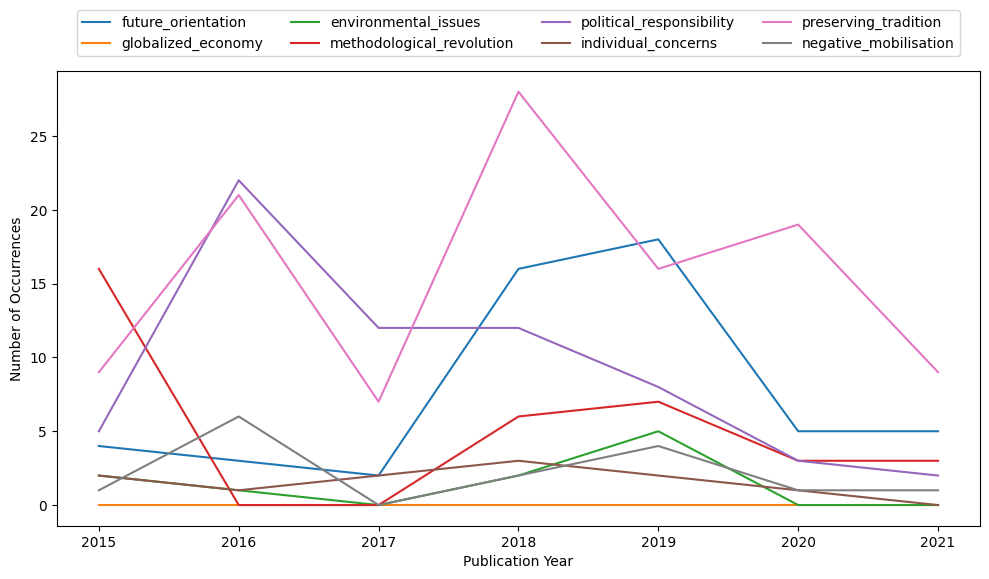

In [11]:
# Create a list of keys to plot
keys_to_plot = list(qual_mediaframes.keys())

# Create a new dataframe with only the columns of interest
plot_data = yearly_data[keys_to_plot]

# Plot the data
plot_data.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.savefig('../Visuals/qual_mediaframes_total.png')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.show()

In [12]:
# Create a copy of df
df_bool = df.copy()

# Add new columns to the dataframe df_copy for each key that is True if the key is in the article more than once and False if the key is not in the article
for key in qual_mediaframes.keys():
    df_bool[key] = df_bool[key].apply(lambda x: True if x > 0 else False)

In [13]:
# Create a new dataframe to store the aggregated data
yearly_data_bool = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data_bool['article_count'] = df_bool.groupby('publication_year')['text'].count()
yearly_data_bool['word_count'] = df_bool.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data_bool.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in qual_mediaframes.keys():
    yearly_data_bool[key] = df_bool.groupby('publication_year')[key].sum()

plot_data_percentage = yearly_data_bool[keys_to_plot]

In [14]:
# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data_bool using loc
plot_data_percentage['publication_count'] = yearly_data_bool.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage[key + '_percentage'] = plot_data_percentage[key] / plot_data_percentage['publication_count']

# Remove the columns for the keys
plot_data_percentage = plot_data_percentage.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage = plot_data_percentage.drop(columns=['publication_count'])

C:\Users\Kai\AppData\Local\Temp\ipykernel_13188\3303098044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_percentage['publication_count'] = yearly_data_bool.loc[:, 'article_count']


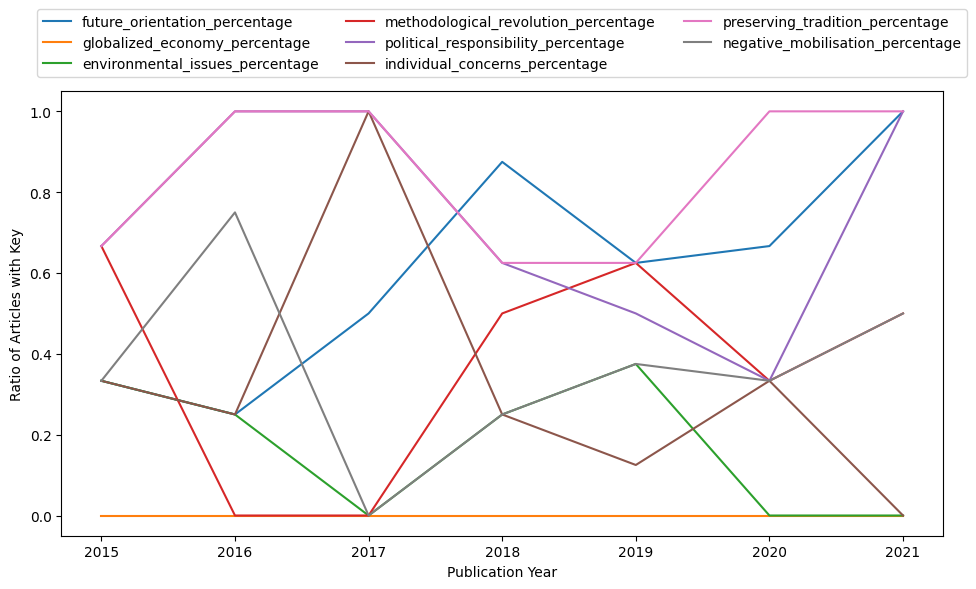

In [15]:
# Plot the data
plot_data_percentage.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_percentage.png')
plt.show()

In [16]:
#print all keys
print(list(qual_mediaframes.keys()))

['future_orientation', 'globalized_economy', 'environmental_issues', 'methodological_revolution', 'political_responsibility', 'individual_concerns', 'preserving_tradition', 'negative_mobilisation']


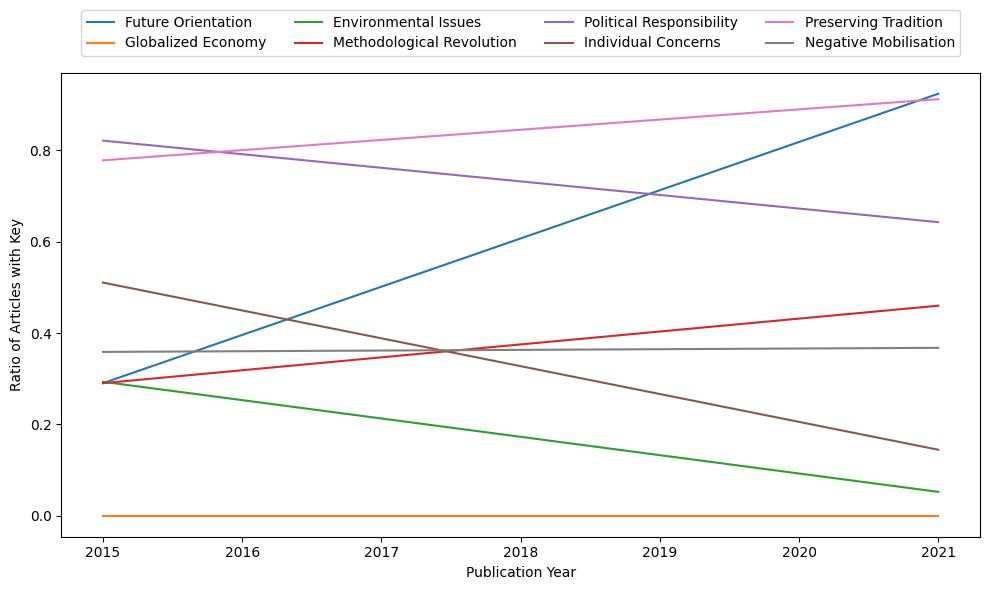

In [17]:
# Plot the regression lines
# Perform linear regression for each qual_mediaframes key
model_future_orientation_percentage = sm.OLS(plot_data_percentage['future_orientation_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_globalized_economy_percentage = sm.OLS(plot_data_percentage['globalized_economy_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_environmental_issues_percentage = sm.OLS(plot_data_percentage['environmental_issues_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_methodological_revolution_percentage = sm.OLS(plot_data_percentage['methodological_revolution_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_political_responsibility_percentage = sm.OLS(plot_data_percentage['political_responsibility_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_individual_concerns_percentage = sm.OLS(plot_data_percentage['individual_concerns_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_preserving_tradition_percentage = sm.OLS(plot_data_percentage['preserving_tradition_percentage'], sm.add_constant(plot_data_percentage.index)).fit()
model_negative_mobilisation_percentage = sm.OLS(plot_data_percentage['negative_mobilisation_percentage'], sm.add_constant(plot_data_percentage.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_percentage.index, model_future_orientation_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Future Orientation')
plt.plot(plot_data_percentage.index, model_globalized_economy_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Globalized Economy')
plt.plot(plot_data_percentage.index, model_environmental_issues_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Environmental Issues')
plt.plot(plot_data_percentage.index, model_methodological_revolution_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Methodological Revolution')
plt.plot(plot_data_percentage.index, model_political_responsibility_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Political Responsibility')
plt.plot(plot_data_percentage.index, model_individual_concerns_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Individual Concerns')
plt.plot(plot_data_percentage.index, model_preserving_tradition_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Preserving Tradition')
plt.plot(plot_data_percentage.index, model_negative_mobilisation_percentage.predict(sm.add_constant(plot_data_percentage.index)), label='Negative Mobilisation')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.savefig('../Visuals/qual_mediaframes_percentage_regression.png')
plt.show()

In [18]:
# Print the Probability values for each model
print(model_future_orientation_percentage.f_pvalue)
print(model_globalized_economy_percentage.f_pvalue)
print(model_environmental_issues_percentage.f_pvalue)
print(model_methodological_revolution_percentage.f_pvalue)
print(model_political_responsibility_percentage.f_pvalue)
print(model_individual_concerns_percentage.f_pvalue)
print(model_preserving_tradition_percentage.f_pvalue)
print(model_negative_mobilisation_percentage.f_pvalue)

0.0182596997512981
nan
0.2331890761256837
0.6352402846951132
0.6098569901357976
0.35776644172554234
0.5900026619747396
0.9761837021655024


C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid


In [19]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_article
plot_data_percentage_article = plot_data.copy()

# Add a new column to the dataframe plot_data called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data using loc
plot_data_percentage_article['publication_count'] = yearly_data.loc[:, 'article_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_article[key + '_percentage'] = plot_data_percentage_article[key] / plot_data_percentage_article['publication_count']

# Remove the columns for the keys
plot_data_percentage_article = plot_data_percentage_article.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_article = plot_data_percentage_article.drop(columns=['publication_count'])

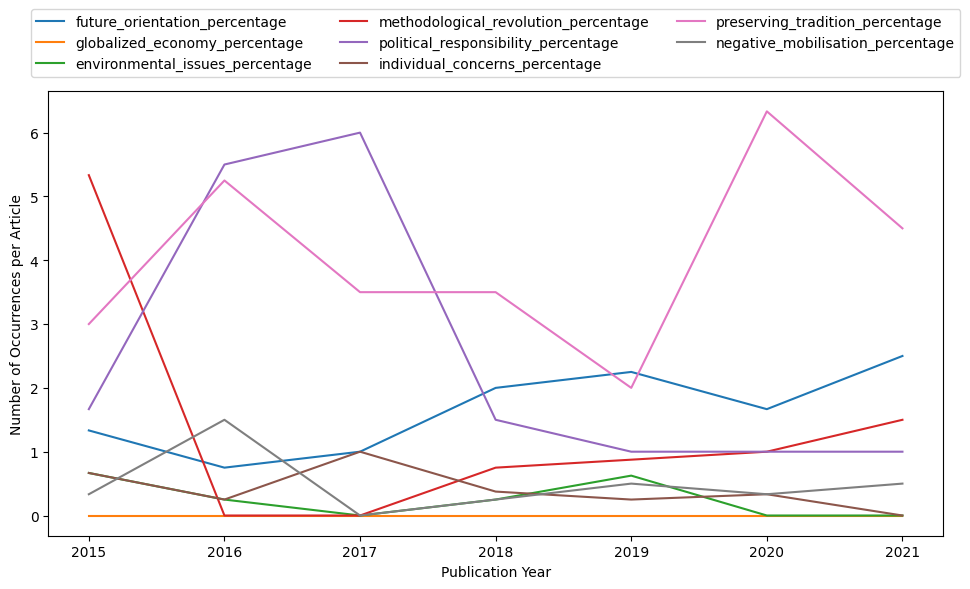

In [20]:
# Plot the data
plot_data_percentage_article.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Article')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_per_article.png')
plt.show()

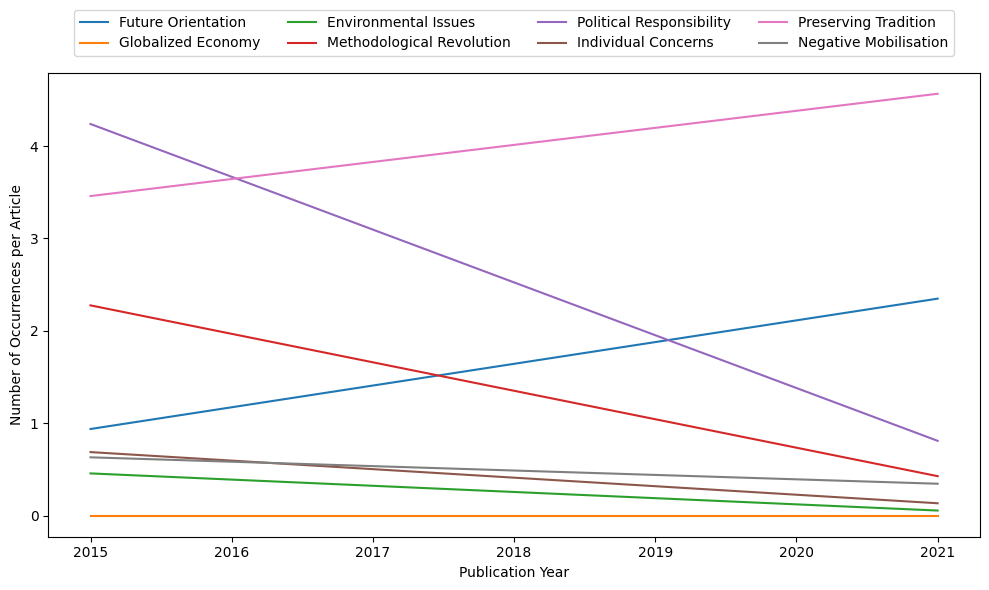

In [21]:
# Plot the regression lines
# Perform linear regression for each qual_mediaframes key
model_future_orientation_percentage_article = sm.OLS(plot_data_percentage_article['future_orientation_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_globalized_economy_percentage_article = sm.OLS(plot_data_percentage_article['globalized_economy_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_environmental_issues_percentage_article = sm.OLS(plot_data_percentage_article['environmental_issues_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_methodological_revolution_percentage_article = sm.OLS(plot_data_percentage_article['methodological_revolution_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_political_responsibility_percentage_article = sm.OLS(plot_data_percentage_article['political_responsibility_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_individual_concerns_percentage_article = sm.OLS(plot_data_percentage_article['individual_concerns_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_preserving_tradition_percentage_article = sm.OLS(plot_data_percentage_article['preserving_tradition_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()
model_negative_mobilisation_percentage_article = sm.OLS(plot_data_percentage_article['negative_mobilisation_percentage'], sm.add_constant(plot_data_percentage_article.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_percentage_article.index, model_future_orientation_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Future Orientation')
plt.plot(plot_data_percentage_article.index, model_globalized_economy_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Globalized Economy')
plt.plot(plot_data_percentage_article.index, model_environmental_issues_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Environmental Issues')
plt.plot(plot_data_percentage_article.index, model_methodological_revolution_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Methodological Revolution')
plt.plot(plot_data_percentage_article.index, model_political_responsibility_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Political Responsibility')
plt.plot(plot_data_percentage_article.index, model_individual_concerns_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Individual Concerns')
plt.plot(plot_data_percentage_article.index, model_preserving_tradition_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Preserving Tradition')
plt.plot(plot_data_percentage_article.index, model_negative_mobilisation_percentage_article.predict(sm.add_constant(plot_data_percentage_article.index)), label='Negative Mobilisation')
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Article')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.savefig('../Visuals/qual_mediaframes_per_article_regression.png')
plt.show()

In [22]:
# Print the Probability values for each model
print(model_future_orientation_percentage_article.f_pvalue)
print(model_globalized_economy_percentage_article.f_pvalue)
print(model_environmental_issues_percentage_article.f_pvalue)
print(model_methodological_revolution_percentage_article.f_pvalue)
print(model_political_responsibility_percentage_article.f_pvalue)
print(model_individual_concerns_percentage_article.f_pvalue)
print(model_preserving_tradition_percentage_article.f_pvalue)
print(model_negative_mobilisation_percentage_article.f_pvalue)

0.03816353593590124
nan
0.2527613006143088
0.4245234967338049
0.19601269520509562
0.14574403715521753
0.5530344612107196
0.642577076189401


C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid


In [23]:
# Copy the dataframe plot_data to a new dataframe plot_data_percentage_word
plot_data_percentage_word = plot_data.copy()

# Add a new column to the dataframe plot_data called 'word_count' with the value of the column 'word_count' of the dataframe yearly_data using loc
plot_data_percentage_word['word_count'] = yearly_data.loc[:, 'word_count']

# Add new columns to the dataframe plot_data for each key
for key in qual_mediaframes.keys():
    plot_data_percentage_word[key + '_percentage'] = plot_data_percentage_word[key] / plot_data_percentage_word['word_count']

# Remove the columns for the keys
plot_data_percentage_word = plot_data_percentage_word.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_percentage_word = plot_data_percentage_word.drop(columns=['word_count'])

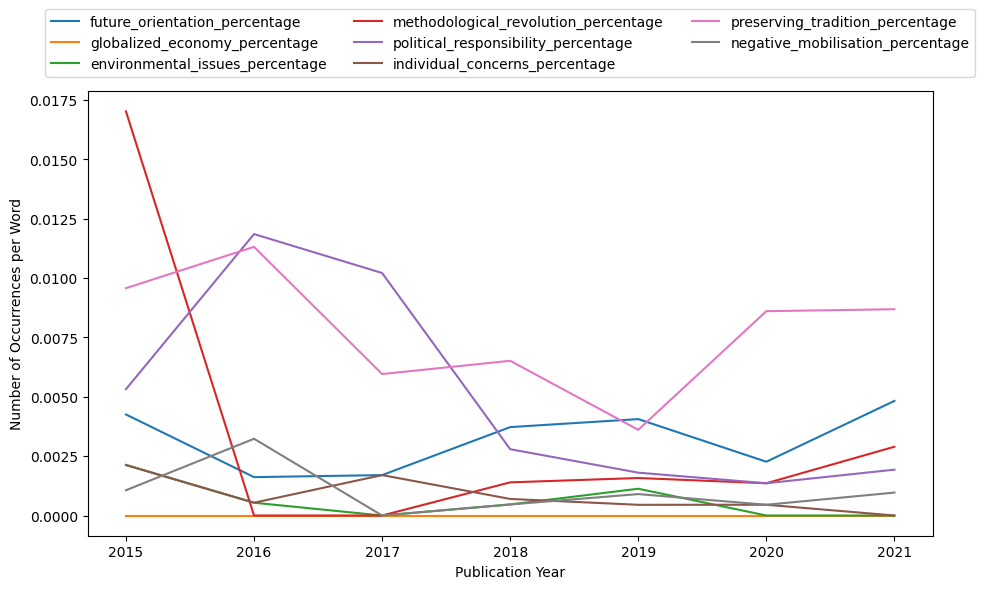

In [24]:
# Plot the data
plot_data_percentage_word.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Word')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_per_word.png')
plt.show()

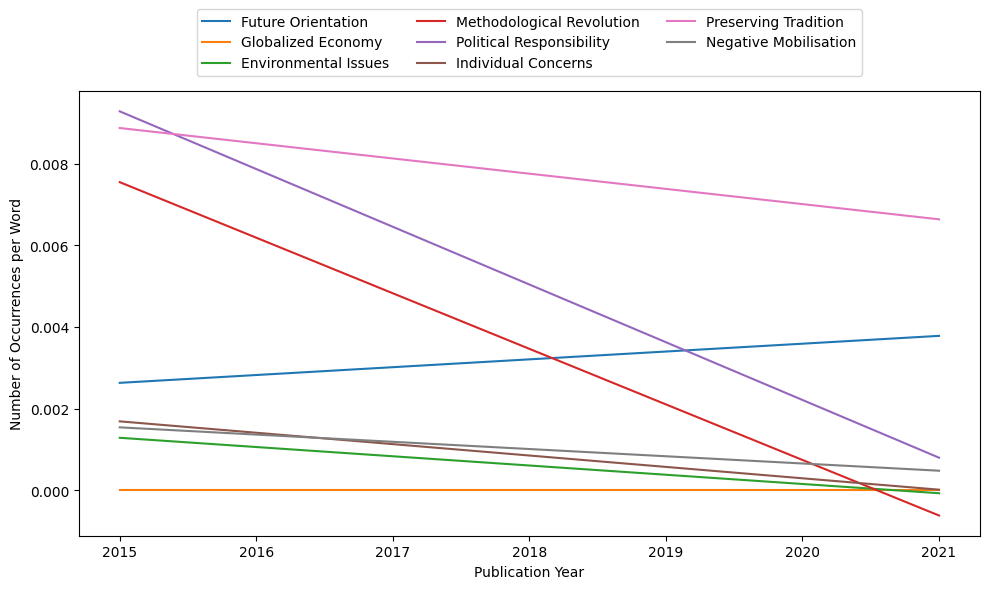

In [25]:
# Plot the regression lines
# Perform linear regression for each qual_mediaframes key
model_future_orientation_percentage_word = sm.OLS(plot_data_percentage_word['future_orientation_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_globalized_economy_percentage_word = sm.OLS(plot_data_percentage_word['globalized_economy_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_environmental_issues_percentage_word = sm.OLS(plot_data_percentage_word['environmental_issues_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_methodological_revolution_percentage_word = sm.OLS(plot_data_percentage_word['methodological_revolution_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_political_responsibility_percentage_word = sm.OLS(plot_data_percentage_word['political_responsibility_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_individual_concerns_percentage_word = sm.OLS(plot_data_percentage_word['individual_concerns_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_preserving_tradition_percentage_word = sm.OLS(plot_data_percentage_word['preserving_tradition_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()
model_negative_mobilisation_percentage_word = sm.OLS(plot_data_percentage_word['negative_mobilisation_percentage'], sm.add_constant(plot_data_percentage_word.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_percentage_word.index, model_future_orientation_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Future Orientation')
plt.plot(plot_data_percentage_word.index, model_globalized_economy_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Globalized Economy')
plt.plot(plot_data_percentage_word.index, model_environmental_issues_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Environmental Issues')
plt.plot(plot_data_percentage_word.index, model_methodological_revolution_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Methodological Revolution')
plt.plot(plot_data_percentage_word.index, model_political_responsibility_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Political Responsibility')
plt.plot(plot_data_percentage_word.index, model_individual_concerns_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Individual Concerns')
plt.plot(plot_data_percentage_word.index, model_preserving_tradition_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Preserving Tradition')
plt.plot(plot_data_percentage_word.index, model_negative_mobilisation_percentage_word.predict(sm.add_constant(plot_data_percentage_word.index)), label='Negative Mobilisation')
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences per Word')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=3)
plt.savefig('../Visuals/qual_mediaframes_per_word_regression.png')
plt.show()

In [26]:
# Print the Probability values for each model
print(model_future_orientation_percentage_word.f_pvalue)
print(model_globalized_economy_percentage_word.f_pvalue)
print(model_environmental_issues_percentage_word.f_pvalue)
print(model_methodological_revolution_percentage_word.f_pvalue)
print(model_political_responsibility_percentage_word.f_pvalue)
print(model_individual_concerns_percentage_word.f_pvalue)
print(model_preserving_tradition_percentage_word.f_pvalue)
print(model_negative_mobilisation_percentage_word.f_pvalue)

0.49203157505658657
nan
0.13665619400935944
0.2702230536793816
0.07595157905404858
0.035916032389226554
0.493567932370728
0.4210719697492324


C:\Users\Kai\AppData\Roaming\Python\Python310\site-packages\statsmodels\regression\linear_model.py:1870: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid


In [27]:
# Special analysis for the key 'Preserving Tradition'
# Add a column in df for each word in 'preserving_tradition'
for word in qual_mediaframes['preserving_tradition']:
    df[word] = 0

# Iterate over each row in the dataframe and count the number of times each of the words in 'preserving_tradition' appears
for index, row in df.iterrows():
    # Get the text
    text = row["text"]

    # Convert the text to lowercase
    text = text.lower()
    
    # Iterate over each word in the list
    for word in qual_mediaframes['preserving_tradition']:
        # Get the number of times the word appears in the text
        count = text.count(word)

        # Set the value in the dataframe
        df.at[index, word] = count

In [28]:
# Create a new dataframe to store the aggregated data
yearly_data2 = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data2['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data2['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data2.index.names = ['year']

# Group the dataframe by year and calculate the count for each word in 'preserving_tradition'
for word in qual_mediaframes['preserving_tradition']:
    yearly_data2[word] = df.groupby('publication_year')[word].sum()

In [29]:
# Create a list of words to plot
words_to_plot = list(qual_mediaframes['preserving_tradition'])

# Create a new dataframe with only the columns of interest
plot_data2 = yearly_data2[words_to_plot]

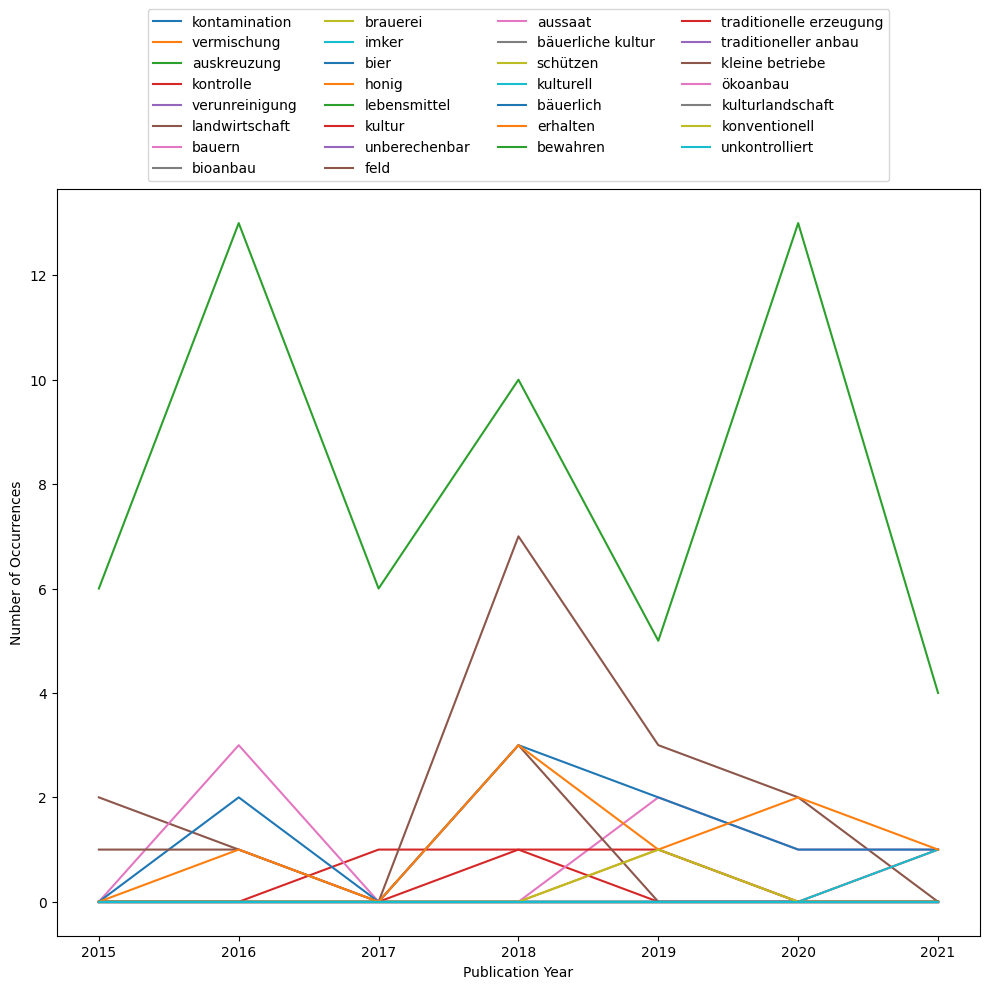

In [30]:
# Plot the data
plot_data2.plot(kind='line', figsize=(10, 10))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.25), loc='upper center', ncol=4)
plt.savefig('../Visuals/qual_mediaframes_preserving_tradition.png')
plt.show()

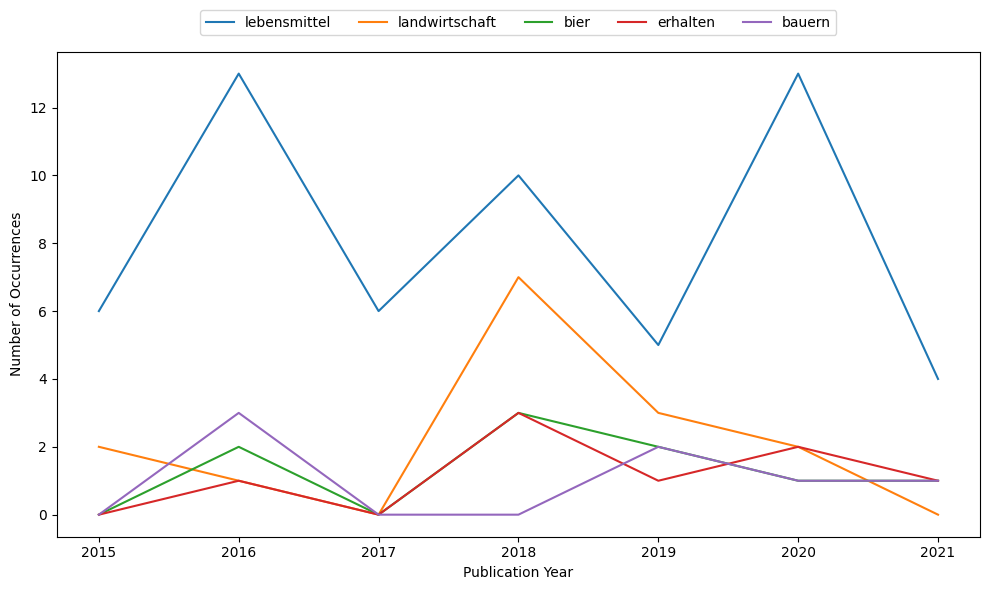

In [31]:
# Check which 5 words occur most often in the articles and save them in a list
most_common_words = plot_data2.sum().sort_values(ascending=False).head(5).index.tolist()

# Create a new dataframe with only the columns of interest
plot_data3 = plot_data2[most_common_words]

# Plot the data
plot_data3.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=5)
plt.savefig('../Visuals/qual_mediaframes_preserving_tradition_most_common.png')
plt.show()

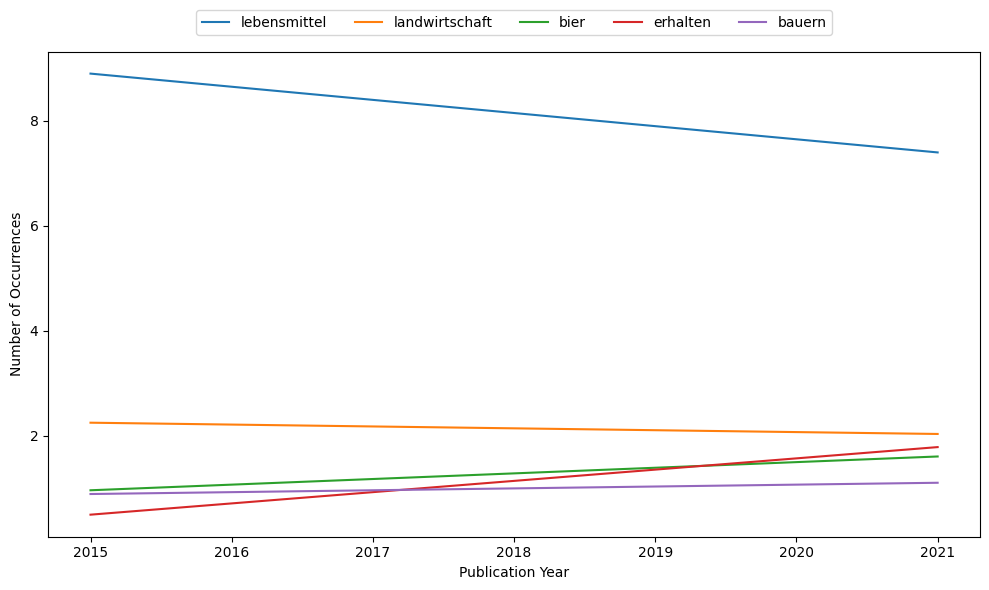

In [32]:
# Plot the regression lines
# Perform linear regression for plot_data3, which contains the date for the words in most_common_words
model_1 = sm.OLS(plot_data3[most_common_words[0]], sm.add_constant(plot_data3.index)).fit()
model_2 = sm.OLS(plot_data3[most_common_words[1]], sm.add_constant(plot_data3.index)).fit()
model_3 = sm.OLS(plot_data3[most_common_words[2]], sm.add_constant(plot_data3.index)).fit()
model_4 = sm.OLS(plot_data3[most_common_words[3]], sm.add_constant(plot_data3.index)).fit()
model_5 = sm.OLS(plot_data3[most_common_words[4]], sm.add_constant(plot_data3.index)).fit()

# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data3.index, model_1.predict(sm.add_constant(plot_data3.index)), label=most_common_words[0])
plt.plot(plot_data3.index, model_2.predict(sm.add_constant(plot_data3.index)), label=most_common_words[1])
plt.plot(plot_data3.index, model_3.predict(sm.add_constant(plot_data3.index)), label=most_common_words[2])
plt.plot(plot_data3.index, model_4.predict(sm.add_constant(plot_data3.index)), label=most_common_words[3])
plt.plot(plot_data3.index, model_5.predict(sm.add_constant(plot_data3.index)), label=most_common_words[4])
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.legend(bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=5)
plt.savefig('../Visuals/qual_mediaframes_preserving_tradition_most_common_regression.png')
plt.show()

### Klinger Emotion Dictionaries

In [33]:
# Create an empty dictionary
klinger = {}

# For each txt file in the folder, read the file and add the content to the dictionary where the key is the filename without .txt and the values are the content of the file, split by line. Encoding is utf-8
for filename in os.listdir('../Data/Dictionaries/Klinger'):
    with open('../Data/Dictionaries/Klinger/' + filename, 'r', encoding='utf-8') as f:
        klinger[filename[:-4]] = f.read().splitlines()

# Go through the dictionary and remove '!' from the values
for key in klinger.keys():
    klinger[key] = [x.replace('!', '') for x in klinger[key]]

#Print the keys and 5 values for each key
for key in klinger.keys():
    print(key, klinger[key][:5])

Ekel ['Aberration', 'Abfall', 'Abgeneigtheit', 'Abgeschmacktheit', 'Ablehnung']
Freude ['Abschluss', 'Adventsfreude', 'Akklamation', 'Amüsement', 'Anerkennung']
Furcht ['Abgrund', 'Abhauen', 'Abhängigkeit', 'Abreibung', 'Abschlussprüfung']
Trauer ['Abbrechen', 'Abgeschlagenheit', 'Abgrund', 'Abschied', 'Abtreibung']
Ueberraschung ['Achtung', 'Achtung', 'Aha-Erlebnis', 'Ahaerlebnis', 'Alarm']
Verachtung ['Aasgeier', 'Aberwitz', 'Abgeschmacktheit', 'Abklatsch', 'Abkömmling']
Wut ['Aggression', 'Aggressivität', 'Amok', 'Anfall', 'Anfeindungen']


In [35]:
# Load small German language model in Spacy
nlp = spacy.load('de_core_news_sm')

# Add a column in df for each key in the dictionary
for key in klinger.keys():
    df[key] = 0

# Add a column in df for each word in the dictionary
for key in klinger.keys():
    for word in klinger[key]:
        df[key + '_' + word] = 0

# Iterate over each row in the dataframe and count the number of times each key appears
for index, row in df.iterrows():
    # Get the text
    text = row["text"]

    # Convert the text to lowercase
    text = text.lower()

    doc = nlp(text)
    
    # Iterate over each key in the dictionary
    for key in klinger.keys():
        counter = 0
        # Iterate over each word in the list for the key
        for keyword in klinger[key]:
            count = 0
            for word in doc:
                if word.text == keyword:
                    count += 1
            counter += count
            df.at[index, key + '_' + keyword] = count
        # Set the value in the dataframe
        df.at[index, key] = counter

In [36]:
df.head()

,nexis_id,title,publication_date,publication_year,publisher,text,clean_text,word_count,in-vitro-fleisch,in-vitro fleisch,...,Wut_Ärgernis,Wut_Übellaunigkeit,Wut_Überfall,Wut_ärgerlich,Wut_ärgerlicherweise,Wut_ärgern,Wut_ätzend,Wut_übellaunig,Wut_übelnehmen,Wut_überschnappen
0,5MNMH621JB0GF09H0000000,Angst vor dem «harten Brexit» auf der Insel - ...,2017-01-15,2017,AP Deutsch,Wenn Großbritannien Ende März den Ausstieg aus...,wenn großbritannien ende märz der ausstieg aus...,763,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5SM3THB1DXFJ50MP0000000,Fleischindustrie wehrt sich gegen Marketing fü...,2018-06-21,2018,AP Deutsch,Fleisch aus dem Labor ist noch eine Zukunftsvi...,fleisch aus der labor sein noch ein zukunftsvi...,708,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5SM3THB1DXFJ50MY0000000,Der AP-Überblick am Nachmittag,2018-06-21,2018,AP Deutsch,Die AP Weltnachrichten haben heute unter ander...,der ap weltnachrichten haben heute unter ander...,632,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5STNVWH1DXFJ53VM0000000,Laborfleisch soll in drei Jahren auf die Telle...,2018-07-17,2018,AP Deutsch,Maastricht (AP) - Das niederländische Unterneh...,maastricht ap der niederländisch unternehmen...,225,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5VHK2XG1JB0GF4Y50000000,Israelische Forscher wollen künstliche Steaks ...,2019-02-26,2019,AP Deutsch,"Die Weltbevölkerung wächst, die Nachfrage nach...",der weltbevölkerung wachsen der nachfrage nach...,631,1,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Create a new dataframe to store the aggregated data
yearly_data_klinger = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data_klinger['article_count'] = df.groupby('publication_year')['text'].count()
yearly_data_klinger['word_count'] = df.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data_klinger.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in klinger.keys():
    yearly_data_klinger[key] = df.groupby('publication_year')[key].sum()

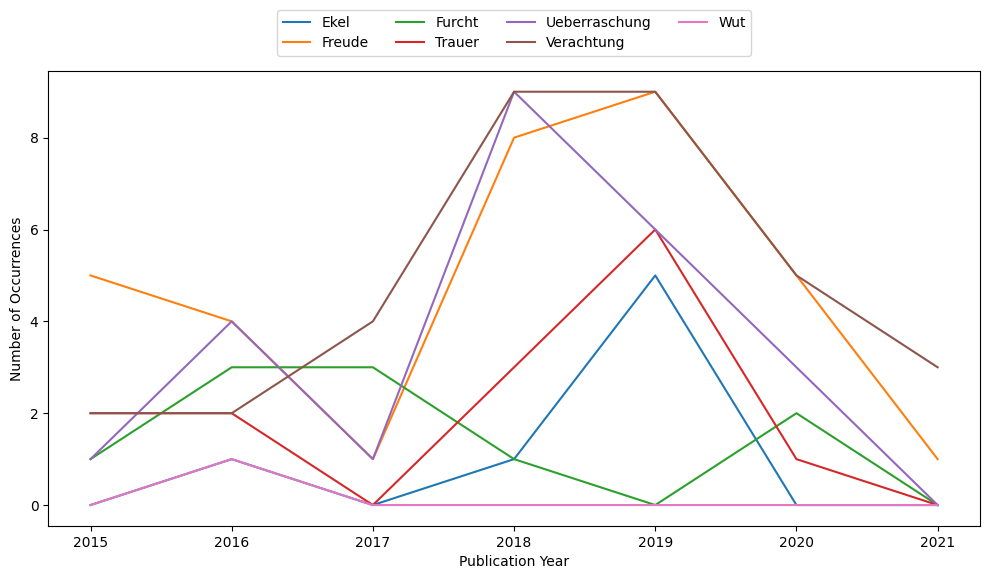

In [38]:
# Create a list of keys to plot
keys_to_plot = list(klinger.keys())

# Create a new dataframe with only the columns of interest
plot_data_klinger = yearly_data_klinger[keys_to_plot]

# Plot the data
plot_data_klinger.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Number of Occurrences')
plt.savefig('../Visuals/klinger_total.png')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.show()

In [39]:
# Create a copy of df
df_bool_klinger = df.copy()

# Add new columns to the dataframe df_copy for each key that is True if the key is in the article more than once and False if the key is not in the article
for key in klinger.keys():
    df_bool_klinger[key] = df_bool_klinger[key].apply(lambda x: True if x > 0 else False)

In [40]:
# Create a new dataframe to store the aggregated data
yearly_data_bool_klinger = pd.DataFrame()

# Group the dataframe by year and calculate the article count and word count
yearly_data_bool_klinger['article_count'] = df_bool_klinger.groupby('publication_year')['text'].count()
yearly_data_bool_klinger['word_count'] = df_bool_klinger.groupby('publication_year')['word_count'].sum()

# Rename the column publication_year to year
yearly_data_bool_klinger.index.names = ['year']

# Group the dataframe by year and calculate the count for each key
for key in klinger.keys():
    yearly_data_bool_klinger[key] = df_bool_klinger.groupby('publication_year')[key].sum()

plot_data_klinger_percentage = yearly_data_bool_klinger[keys_to_plot]

In [41]:
# Add a new column to the dataframe plot_data_klinger called 'publication_count' with the value of the column 'article_count' of the dataframe yearly_data_bool_klinger using loc
plot_data_klinger_percentage['publication_count'] = yearly_data_bool_klinger.loc[:, 'article_count']

# Add new columns to the dataframe plot_data_klinger for each key
for key in klinger.keys():
    plot_data_klinger_percentage[key + '_percentage'] = plot_data_klinger_percentage[key] / plot_data_klinger_percentage['publication_count']

# Remove the columns for the keys
plot_data_klinger_percentage = plot_data_klinger_percentage.drop(columns=keys_to_plot)

# Remove the column 'publication_count'
plot_data_klinger_percentage = plot_data_klinger_percentage.drop(columns=['publication_count'])

C:\Users\Kai\AppData\Local\Temp\ipykernel_13188\3957048254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_klinger_percentage['publication_count'] = yearly_data_bool_klinger.loc[:, 'article_count']


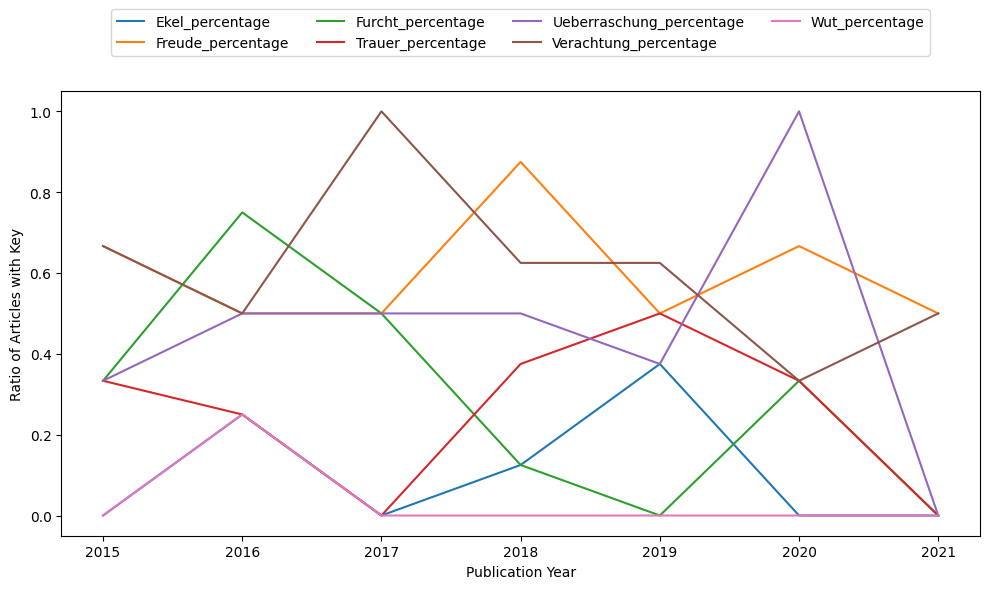

In [42]:
# Plot the data
plot_data_klinger_percentage.plot(kind='line', figsize=(10, 6))
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=4)
plt.savefig('../Visuals/klinger_percentage.png')
plt.show()

In [43]:
#print all keys
print(list(klinger.keys()))

['Ekel', 'Freude', 'Furcht', 'Trauer', 'Ueberraschung', 'Verachtung', 'Wut']


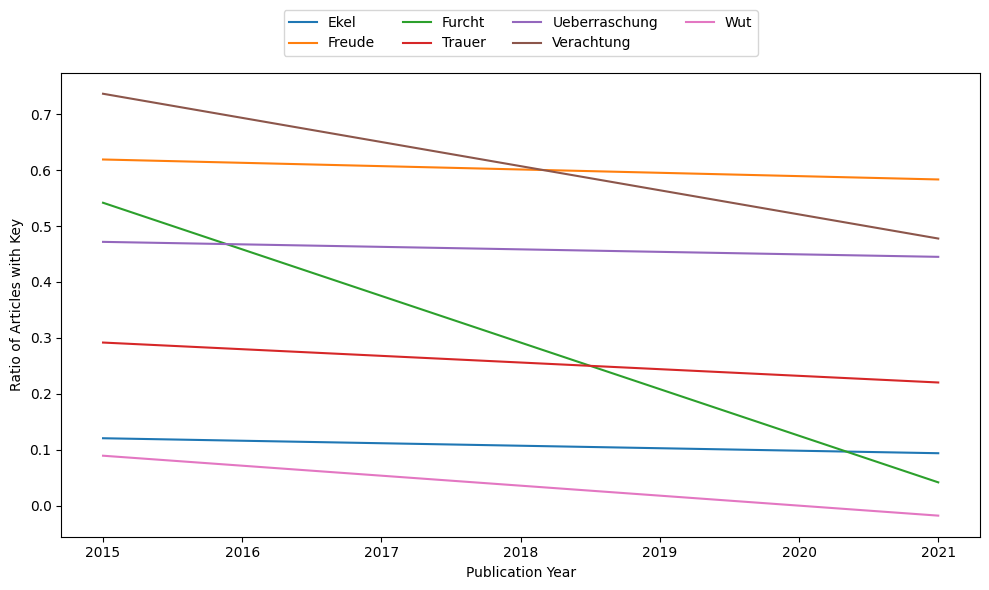

In [44]:
# Plot the regression lines
# Perform linear regression for each klinger key Ekel, Freude, Furcht, Trauer, Ueberraschung, Verachtung, Wut
model_Ekel_percentage = sm.OLS(plot_data_klinger_percentage['Ekel_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()
model_Freude_percentage = sm.OLS(plot_data_klinger_percentage['Freude_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()
model_Furcht_percentage = sm.OLS(plot_data_klinger_percentage['Furcht_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()
model_Trauer_percentage = sm.OLS(plot_data_klinger_percentage['Trauer_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()
model_Ueberraschung_percentage = sm.OLS(plot_data_klinger_percentage['Ueberraschung_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()
model_Verachtung_percentage = sm.OLS(plot_data_klinger_percentage['Verachtung_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()
model_Wut_percentage = sm.OLS(plot_data_klinger_percentage['Wut_percentage'], sm.add_constant(plot_data_klinger_percentage.index)).fit()


# Plot the regression lines
plt.figure(figsize=(10, 6))
plt.plot(plot_data_klinger_percentage.index, model_Ekel_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Ekel')
plt.plot(plot_data_klinger_percentage.index, model_Freude_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Freude')
plt.plot(plot_data_klinger_percentage.index, model_Furcht_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Furcht')
plt.plot(plot_data_klinger_percentage.index, model_Trauer_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Trauer')
plt.plot(plot_data_klinger_percentage.index, model_Ueberraschung_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Ueberraschung')
plt.plot(plot_data_klinger_percentage.index, model_Verachtung_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Verachtung')
plt.plot(plot_data_klinger_percentage.index, model_Wut_percentage.predict(sm.add_constant(plot_data_klinger_percentage.index)), label='Wut')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Key')
plt.legend(bbox_to_anchor=(0.5, 1.15), loc='upper center', ncol=4)
plt.savefig('../Visuals/klinger_percentage_regression.png')
plt.show()

In [45]:
# Print the Probability values for each model
print(model_Ekel_percentage.f_pvalue)
print(model_Freude_percentage.f_pvalue)
print(model_Furcht_percentage.f_pvalue)
print(model_Trauer_percentage.f_pvalue)
print(model_Ueberraschung_percentage.f_pvalue)
print(model_Verachtung_percentage.f_pvalue)
print(model_Wut_percentage.f_pvalue)

0.892416153397204
0.8490631237158031
0.11117872940552573
0.7724008527989603
0.9450076522320432
0.3098740153789767
0.36321746764915175


In [46]:
# For each column in the dataframe df, check if the column name contains 'Ekel', 'Freude', 'Furcht', 'Trauer', 'Ueberraschung', 'Verachtung' or 'Wut', calculate the sum of the column
for column in df:
    if 'Ekel' in column or 'Freude' in column or 'Furcht' in column or 'Trauer' in column or 'Ueberraschung' in column or 'Verachtung' in column or 'Wut' in column:
        # Calculate the sum of the column
        sum = df[column].sum()

        # Print the column name and the sum only if the sum is greater than 500
        if sum > 500:
            print(column, sum)